<a href="https://colab.research.google.com/github/kmunozz/AnimalAdoptionAnalysis/blob/main/Analysis_of_Influencing_Factors_of_Adoption_at_Sonoma_Animal_Shelter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Influencing Factors of Adoption at Sonoma Animal Shelter

Logan Camerino, Kenia Munoz-Ordaz, Adrian Villalpando

## Introduction

In this notebook, we explore and visualize factors influencing animal adoptions at the Sonoma County Animal Shelter in California.
The data was obtained from the Sonoma Animal Shelter: https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-15-october-2024.csv

The primary focus of our analysis is to identify the factors that influence adoption outcomes specifically for cats and dogs at the shelter. With these analysis we can find patterns that help increase adoption rates.

The leading question guiding our analysis is:

**What factors influence whether an animal will be adopted?**


We will address the following questions:

*   How does an animal's size influence its likelihood of adoption?
*   How does an animal's intake type and condition influence their length of stay and likelihood of adoption?
*   Are there differences in adoption rates and duration between dogs and cats? Does gender play a role in these differences?



## Initial Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

It's important to explore the data and extract some key insights. We achieve this by using methods like .info( ), .describe ( ), and .sample( ).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-15-october-2024.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29012 entries, 0 to 29011
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  21354 non-null  object 
 1   Type                  29012 non-null  object 
 2   Breed                 29012 non-null  object 
 3   Color                 29012 non-null  object 
 4   Sex                   29012 non-null  object 
 5   Size                  28976 non-null  object 
 6   Date Of Birth         21897 non-null  object 
 7   Impound Number        29012 non-null  object 
 8   Kennel Number         29004 non-null  object 
 9   Animal ID             29012 non-null  object 
 10  Intake Date           29012 non-null  object 
 11  Outcome Date          28746 non-null  object 
 12  Days in Shelter       29012 non-null  int64  
 13  Intake Type           29012 non-null  object 
 14  Intake Subtype        29012 non-null  object 
 15  Outcome Type       

The dataset used in this notebook was collected from the Sonoma Animal Shelter between 2013 and 2024. It contains information such as animal type, breed, size, color, intake and outcome details, dates of birth and shelter stay, health conditions, and other identifiers.

Here are descriptions of some of the variables:

| Variable | Description |
| :- | :- |
| Name | Name of the animal. Animal names with an asterisk before them were given by shelter staff.|
| Type | Type of animal |
| Breed | Breed of animal|
| Color | Color of animal, Black, Chocolate, White….|
| Sex | Male, Female, Neutered Male, Spayed Female|
| Size | Large, medium, small, toy|
| Date Of Birth | Approximate date of birth. |
| Intake Date| Date animal was taken into the shelter |
| Outcome Date| Date animal left the shelter |
| Days in Shelter| Student/faculty ratio |
| Intake Type| Reason for intake |

In [ ]:
df.sample(3)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
14723,NaN,DOG,PARSON RUSS TER,WHITE/BROWN,Female,SMALL,05/25/2016,K21-038596,DS50,A404992,...,FIELD,TRANSFER,HSSC,TREATABLE/MANAGEABLE,TREATABLE/REHAB,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
25411,THENYA,DOG,PIT BULL,BLUE/WHITE,Spayed,MED,08/14/2013,K15-015433,TX,A326039,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY,SANTA ROSA,*ROHNERT PARK,94928.0,"94928(38.3499842, -122.6928413)",1
13559,DOZER,DOG,PIT BULL,TAN,Neutered,MED,12/26/2017,K19-034617,DS70,A389038,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95476.0,"95476(38.288405, -122.464525)",1


This sample shows a few rows from the dataset, where each row represents an individual animal from the shelter. Each row captures comprehensive information about the animal using our variables.

In [ ]:
df.describe().round(1)

,Days in Shelter,Outcome Zip Code,Count
count,29012.0,24756.0,29012.0
mean,19.6,95019.7,1.0
std,42.7,3776.8,0.1
min,0.0,1922.0,0.0
25%,1.0,95401.0,1.0
50%,9.0,95405.0,1.0
75%,25.0,95425.0,1.0
max,3704.0,99701.0,1.0


The .describe( ) method provides a statistics summary for numerical columns such as 'Days in Shelter' and 'Outcome Zip Code.' While the zip code data is not relevant for our adoption analysis, the 'Days in Shelter' variable can offer valuable insights into the adoptability of animals. Next, we'll explore the possible values for other key variables, such as size, sex, and intake condition, to better understand the dataset.

Now is a good time to visualize some of these key variables to understand how their values are distributed.

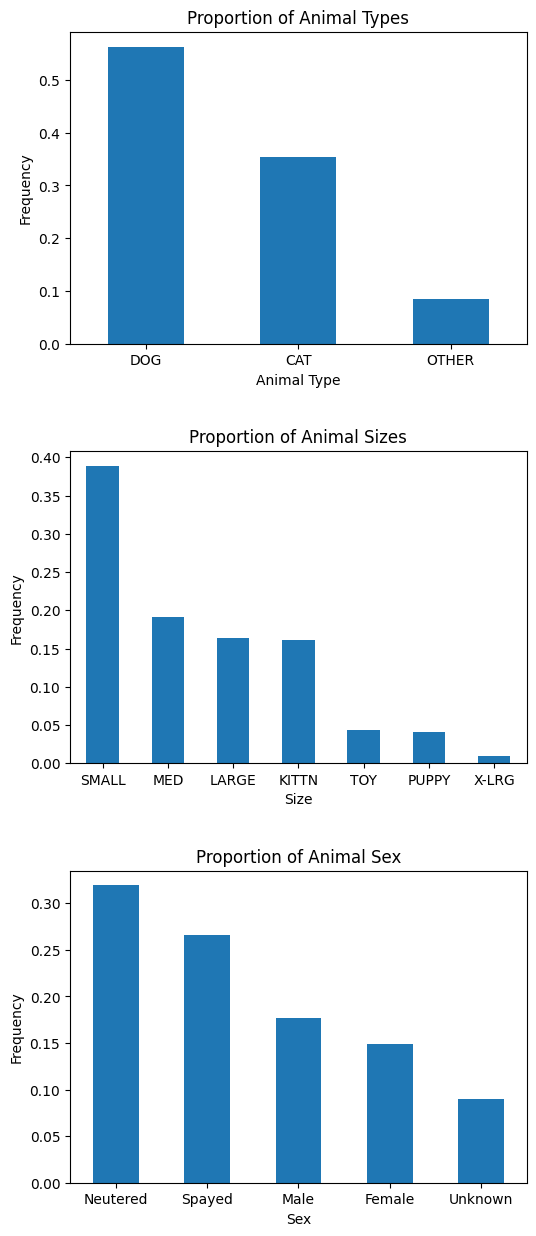

In [ ]:
fig,ax = plt.subplots(3, 1, figsize=(6,13))
df['Type'].value_counts(normalize=True).plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Proportion of Animal Types')
ax[0].set_xlabel('Animal Type')
ax[0].set_ylabel("Frequency")

df['Size'].value_counts(normalize=True).plot.bar(ax=ax[1],rot=0)
ax[1].set_title('Proportion of Animal Sizes')
ax[1].set_xlabel('Size')
ax[1].set_ylabel("Frequency")

df['Sex'].value_counts(normalize=True).plot.bar(ax=ax[2],rot=0)
ax[2].set_title('Proportion of Animal Sex')
ax[2].set_xlabel('Sex')
ax[2].set_ylabel("Frequency")
fig.tight_layout(pad=3.0)
plt.show()

In our top plot we can see about 60% of the animals in the shelter are dogs and 35% are cats, totaling 95% of the data. With the next two plots we can see the distribution of the different sizes and sex of animals in our dataset.

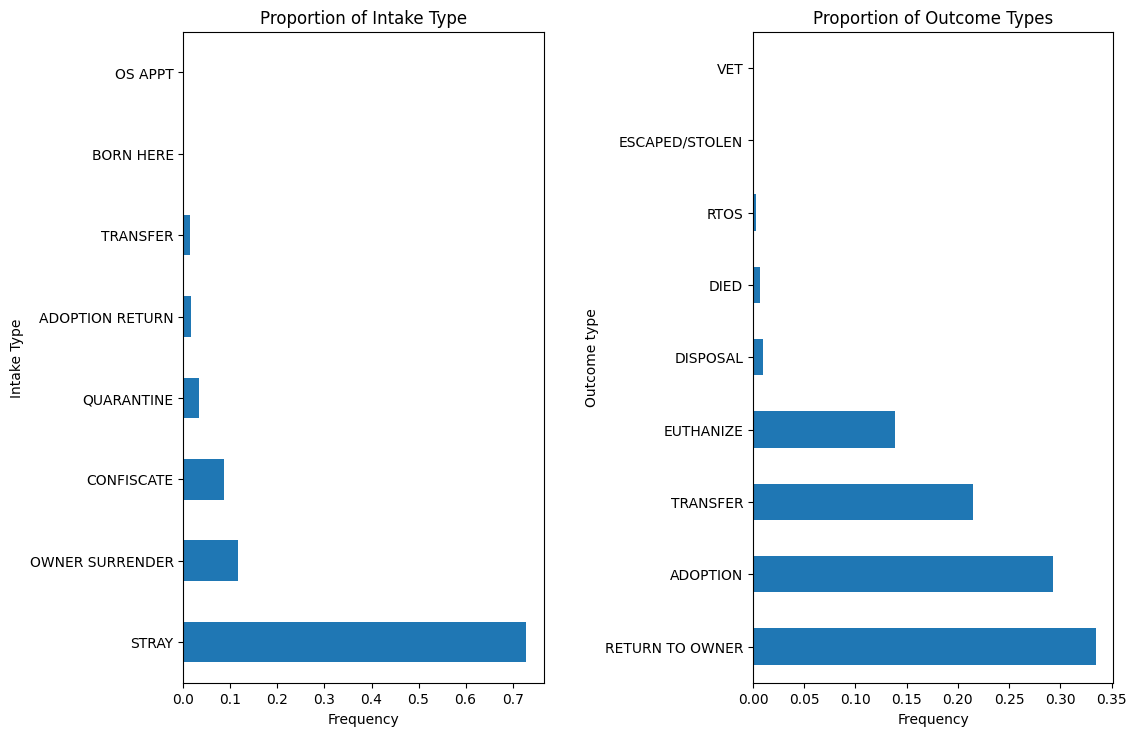

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
df['Intake Type'].value_counts(normalize=True).plot.barh()
plt.title('Proportion of Intake Type')
plt.xlabel('Frequency')
plt.ylabel('Intake Type')

plt.subplot(1, 2, 2)
df['Outcome Type'].value_counts(normalize=True).plot.barh()
plt.title('Proportion of Outcome Types')
plt.xlabel('Frequency')
plt.ylabel('Outcome type')
plt.tight_layout(pad = 3.0)
plt.show()

These plots reveal that the majority of the data is concentrated around one primary intake type and four key outcome types.

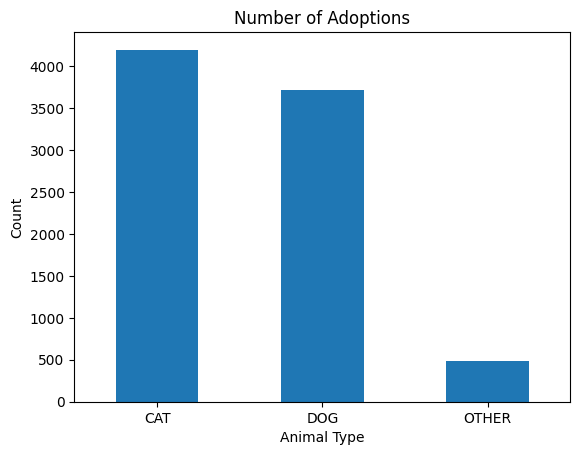

In [ ]:
df[df['Outcome Type'] == 'ADOPTION']['Type'].value_counts().plot.bar(rot=0);
plt.title('Number of Adoptions')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

These plots display the total number of adoptions for each animal type. Since the majority of adoptions are for cats and dogs, our focus will be on these two animal types.

## Data preprocessing

Since not all variables are relevant to our adoption analysis, we can drop certain columns, such as location information. Additionally, we convert the 'Date Of Birth' column to a pandas datetime format to calculate the animals' ages, which we add as a new column 'Age'. We also filter the dataset to focus on cats and dogs only, and further filter to include only records where the outcome type is 'ADOPTION.'

In [ ]:
df.drop(['Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code', 'Location'], axis = 1);

In [ ]:
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])

today = pd.to_datetime('2024-10-23')
df['Age'] = (today - df['Date Of Birth']).dt.days // 365

df1 = df[df['Type'].isin(['CAT', 'DOG'])]
df_adoptions = df1[df1['Outcome Type'] == 'ADOPTION']

# Data exploration and visualization

## How does an animal's size influence its likelihood of adoption?

Let's begin by analyzing our first question: "How does an animal's size influence its likelihood of adoption?" We approached this question by calculating the adoption rate by size separately for cats and dogs.

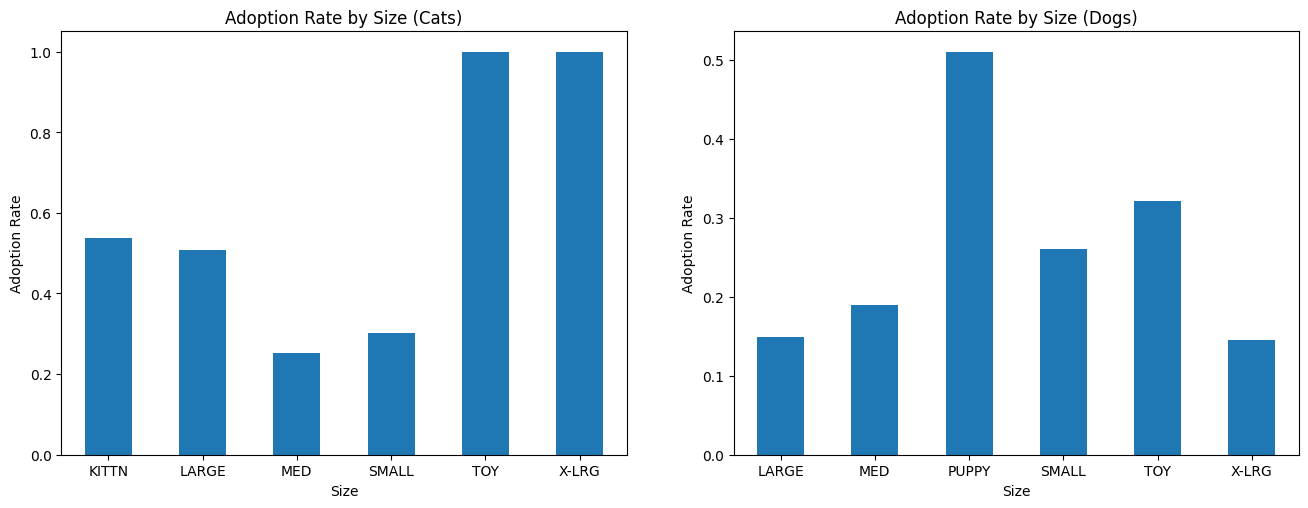

In [ ]:
df_cats = df1[df1['Type'] == 'CAT']
df_dogs = df1[df1['Type'] == 'DOG']


cat_adoption_rates = df_cats.groupby('Size')['Outcome Type'].apply(lambda x: (x == 'ADOPTION').mean())
dog_adoption_rates = df_dogs.groupby('Size')['Outcome Type'].apply(lambda x: (x == 'ADOPTION').mean())


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

cat_adoption_rates.plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Adoption Rate by Size (Cats)')
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Adoption Rate')
dog_adoption_rates.plot.bar(ax=ax[1],rot=0)
ax[1].set_title('Adoption Rate by Size (Dogs)')
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Adoption Rate')

fig.tight_layout(pad = 4.0)
plt.show()

While the plot for dogs looked good, the plot for cats showed that two sizes ("Toy" and "X-LRG") had an adoption rate of 100%. To investigate further, we used a quick print statement to display the value counts for each size. We found that there was only 1 cat categorized as "Toy" and 2 cats as "X-LRG" in the dataset. To visually represent this, we created a plot to illustrate the small sample size for these categories.

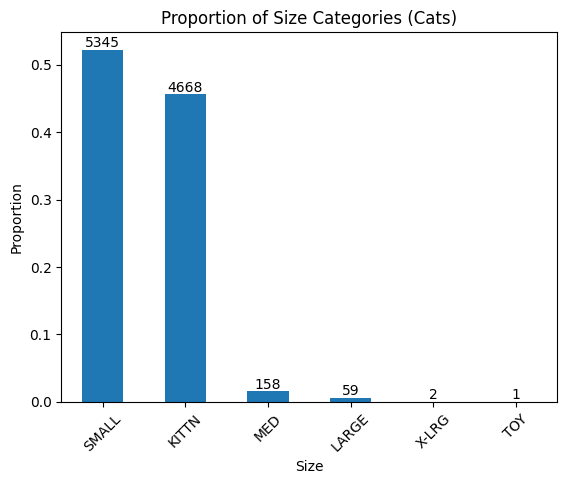

In [ ]:
cat_count = df_cats['Size'].value_counts(normalize=True)
cat_count.plot.bar()
plt.title('Proportion of Size Categories (Cats)')
plt.xlabel('Size')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

for index, value in enumerate(cat_count):
    count = df_cats['Size'].value_counts().iloc[index]
    plt.text(index, value, f'{count}', ha='center', va='bottom', fontsize=10)

plt.show()

This visualization allowes us to see why we excluded "Toy" and "X-LRG" as the most adopted sizes for cats, given the extremely limited data. Instead, we concluded that "KITTN" was the most adopted size for cats, using this visual evidence to explain our reasoning.

In [ ]:
sort_size_cat = cat_adoption_rates.sort_values(ascending=False)

most_adopted_size_cat = sort_size_cat.index[2]
most_adopted_size_dog = dog_adoption_rates.idxmax()

print("The most adopted size for cats is:", most_adopted_size_cat)
print("The most adopted size for dogs is:", most_adopted_size_dog)

The most adopted size for cats is: KITTN
The most adopted size for dogs is: PUPPY


We verified our findings with a print statement, confirming that "KITTN" and "PUPPY" were the most adopted sizes for cats and dogs, respectively. We concluded that these sizes have higher adoption rates compared to other sizes. Although these sizes might suggest the animals are young, it's important to note that size alone, not age, determines these categories.

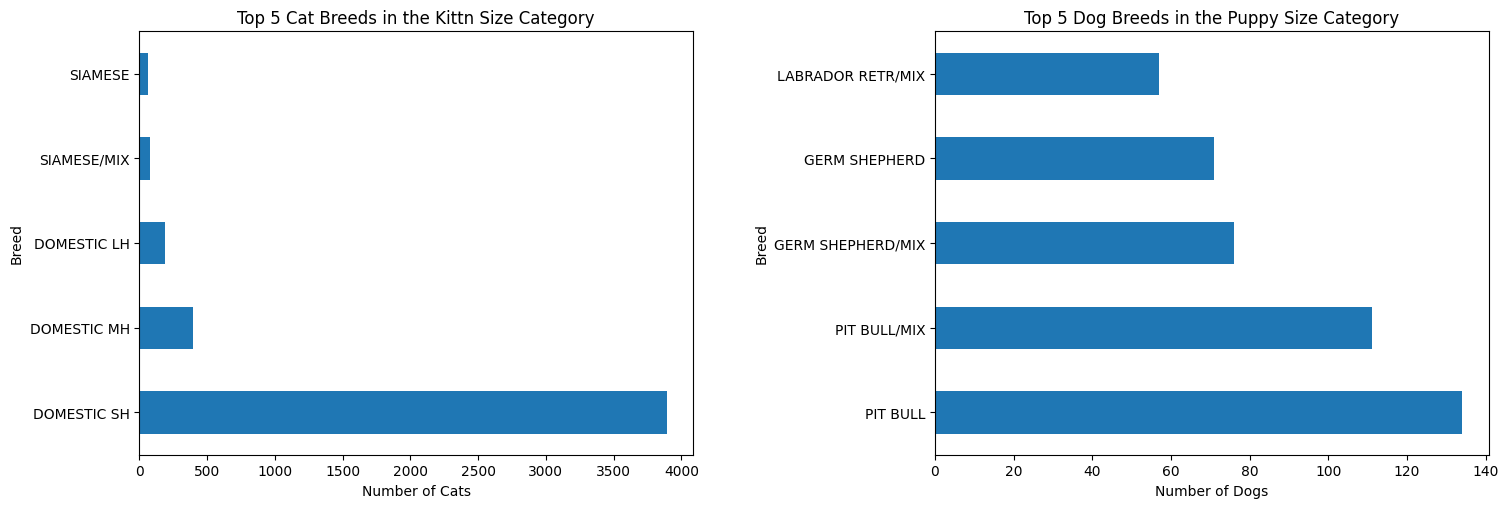

In [ ]:
df_cats_top_size = df_cats[df_cats['Size'] == most_adopted_size_cat]
df_dogs_top_size = df_dogs[df_dogs['Size'] == most_adopted_size_dog]

top5catbreeds = df_cats_top_size['Breed'].value_counts().head(5)
top5dogbreeds = df_dogs_top_size['Breed'].value_counts().head(5)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

top5catbreeds.plot.barh(ax=ax[0])
ax[0].set_title(f'Top 5 Cat Breeds in the Kittn Size Category')
ax[0].set_ylabel('Breed')
ax[0].set_xlabel('Number of Cats')

top5dogbreeds.plot.barh(ax=ax[1])
ax[1].set_title(f'Top 5 Dog Breeds in the Puppy Size Category')
ax[1].set_ylabel('Breed')
ax[1].set_xlabel('Number of Dogs')


fig.tight_layout(pad=4.0)
plt.show();

Finally, we created a visualization showing the top 5 breeds for both cats and dogs within the most adopted size categories. We found that within the "KITTN" size category our dataset had more common or mixed domestic breeds, while within the "PUPPY" size category, pitbulls (including mixes), German Shepherd mixes, and Labrador Retrievers were the most common breeds.

##How does an animal's intake type and outcome type influence their length of stay and likelihood of adoption?

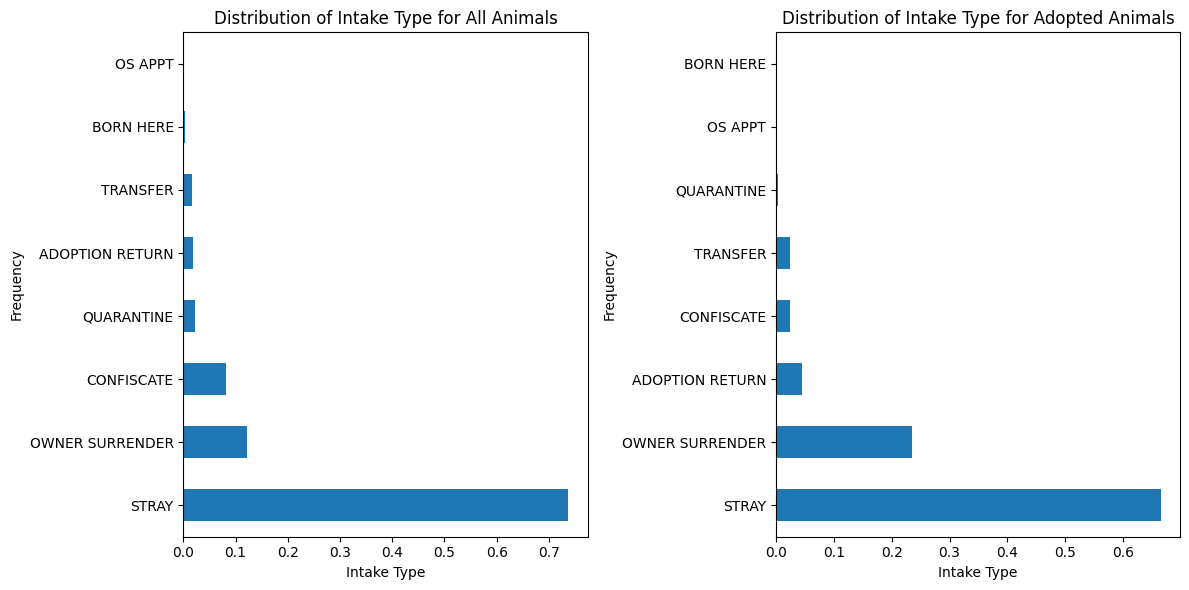

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df1['Intake Type'].value_counts(normalize=True).plot.barh(rot=0)
plt.title('Distribution of Intake Type for All Animals')
plt.xlabel('Intake Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
df_adoptions['Intake Type'].value_counts(normalize=True).plot.barh(rot=0)
plt.title('Distribution of Intake Type for Adopted Animals')
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show();

The intake type stray has the highest adoption count, does that mean stray animals are more likely to be adopted? This can be skewed since the majortiy of the animals in the shelter are Stray animals. A more useful representation would be looking at the probabilty of a specific intake type leading to a specific oucome type

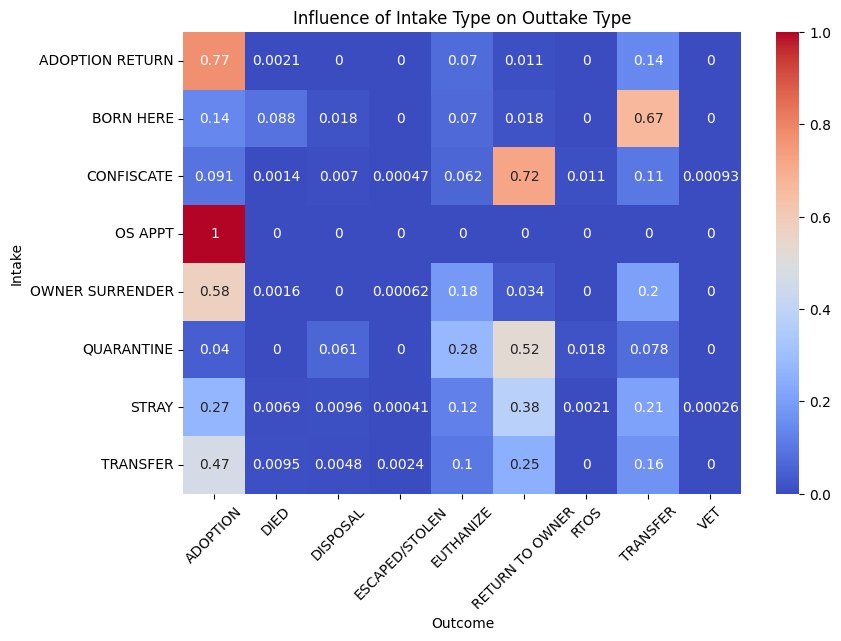

In [ ]:
heatmap_data = pd.crosstab(index=df1['Intake Type'], columns=df1['Outcome Type'], normalize='index')
#print(heatmap_data)
plt.figure(figsize=(9, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title('Influence of Intake Type on Outtake Type')
plt.xlabel('Outcome')
plt.ylabel('Intake')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show();

A heatmap can show us how likely a specific combination of intake and outcome is to occur. An example of this is when looking at adoption as an outcome. Out of all the intakes for adoption as an outcome, we see that 'OS APPT' occur the most. A important observation is that some combinations have never occurred, such as an animal (dog or cat) that was adopted and returned has never escaped or been stolen.

Some combinations of intake types and outcome types occur more than other. Does these combinations effect the length of stay for the animal?

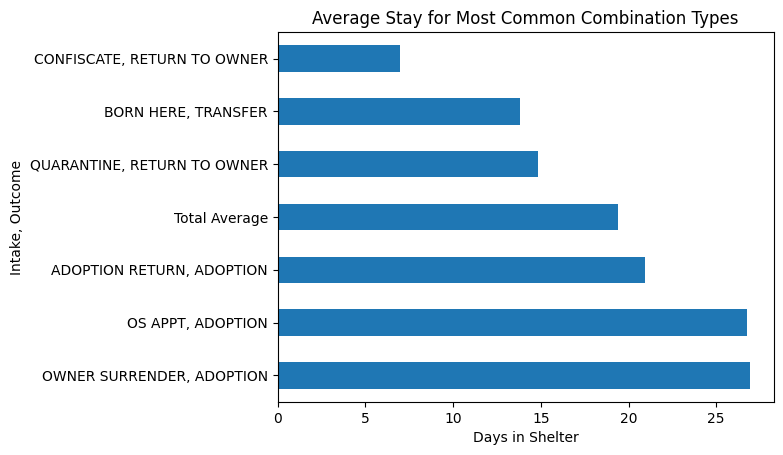

In [ ]:
avg=df1['Days in Shelter'].mean()

df_tranfer_born = df1[(df1['Outcome Type'] == 'TRANSFER') & (df1['Intake Type'] == 'BORN HERE')]
avg_tranfser_born = df_tranfer_born['Days in Shelter'].mean()

df_adoption_return = df1[(df1['Outcome Type'] == 'ADOPTION') & (df1['Intake Type'] == 'ADOPTION RETURN')]
avg_adoption_return = df_adoption_return['Days in Shelter'].mean()

df_return_confiscate = df1[(df1['Outcome Type'] == 'RETURN TO OWNER') & (df1['Intake Type'] == 'CONFISCATE')]
avg_return_confiscate = df_return_confiscate['Days in Shelter'].mean()

df_adoption_surrender = df1[(df1['Outcome Type'] == 'ADOPTION') & (df1['Intake Type'] == 'OWNER SURRENDER')]
avg_adoption_surrender = df_adoption_surrender['Days in Shelter'].mean()

df_adoption_os = df1[(df1['Outcome Type'] == 'ADOPTION') & (df1['Intake Type'] == 'OS APPT')]
avg_adoption_os = df_adoption_os['Days in Shelter'].mean()

df_return_quarantine = df1[(df1['Outcome Type'] == 'RETURN TO OWNER') & (df1['Intake Type'] == 'QUARANTINE')]
avg_return_quarantine = df_return_quarantine['Days in Shelter'].mean()

data = {
    'Combination': ['Total Average', 'BORN HERE, TRANSFER', 'ADOPTION RETURN, ADOPTION', 'CONFISCATE, RETURN TO OWNER', 'OWNER SURRENDER, ADOPTION', 'OS APPT, ADOPTION', 'QUARANTINE, RETURN TO OWNER'],
    'Length of Stay': [avg, avg_tranfser_born, avg_adoption_return, avg_return_confiscate, avg_adoption_surrender, avg_adoption_os, avg_return_quarantine],
}

df_length_of_stay = pd.DataFrame(data)
df_length_of_stay.sort_values(by='Length of Stay', ascending=False).plot.barh(rot=0, x='Combination', legend=False)
plt.title("Average Stay for Most Common Combination Types")
plt.xlabel('Days in Shelter')
plt.ylabel('Intake, Outcome');
plt.show();


For the most common combination types(the ones above .5) we can see that most do effect the length of stay for an animal. So we can confidently say that the most combinations do influence the legnth of stay for an animal(cats and dogs). Some like 'BORN HERE, TRANSFER' for the shorter and some 'OWNER SURRENDER, ADOPTION' for the longer. Lastly we can also see that most adoptions combinations take longer than the average stay of all animals and those who are tansfered and returned to owner take less time than the total average.

##Are there differences in adoption rates and duration between dogs and cats? Does gender play a role in these differences?

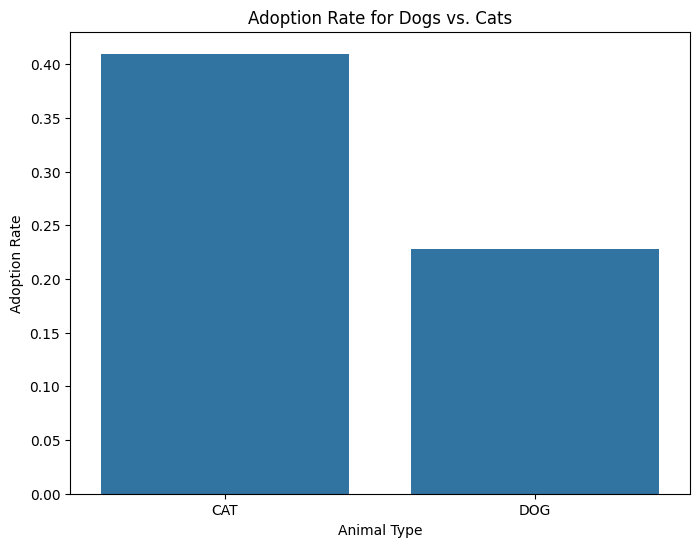

In [ ]:
df_dog_cat = df1[df1['Type'].isin(['DOG', 'CAT'])]
total_animals = df_dog_cat['Type'].value_counts()
adopted = df_dog_cat[df_dog_cat['Outcome Type'] == 'ADOPTION']['Type'].value_counts()
adoption_rate = adopted / total_animals

plt.figure(figsize=(8,6))
sns.barplot(x=adoption_rate.index, y=adoption_rate.values)
plt.title('Adoption Rate for Dogs vs. Cats')
plt.xlabel('Animal Type')
plt.ylabel('Adoption Rate')
plt.show();

We will explore the number of days that an animal is in a shelter, specifically dogs vs. cats. Just from the rates, we can already assume that dogs will have  slightly larger graph than the cat.


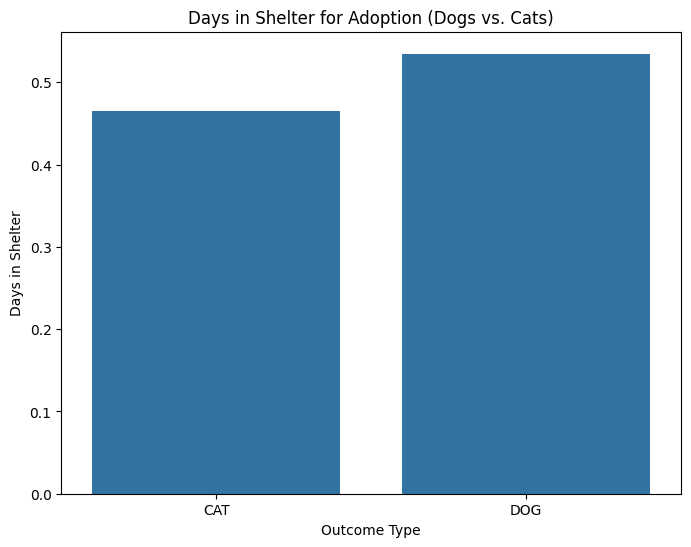

In [ ]:
adop_anim = df1[df1['Outcome Type'] == 'ADOPTION']
total_days = adop_anim['Days in Shelter'].sum()

days_type = adop_anim.groupby('Type')['Days in Shelter'].sum()
normalized = days_type / total_days
normalized_df = pd.DataFrame({'Type': normalized.index, 'Days in Shelter': normalized.values})


plt.figure(figsize=(8,6))
sns.barplot(x='Type', y='Days in Shelter', data=normalized_df)
plt.title('Days in Shelter for Adoption (Dogs vs. Cats)')
plt.xlabel('Outcome Type')
plt.ylabel('Days in Shelter')
plt.show();

We see a correlation between the adoption rates and the days in shelter for adoption between cats and dogs. If the animal has a higher adoption rate, there is a good chance that they will have a lower time in the shelter due to being adopted. The other can also be said that if an animal has a lower adoption rate, the days in shelter go up.



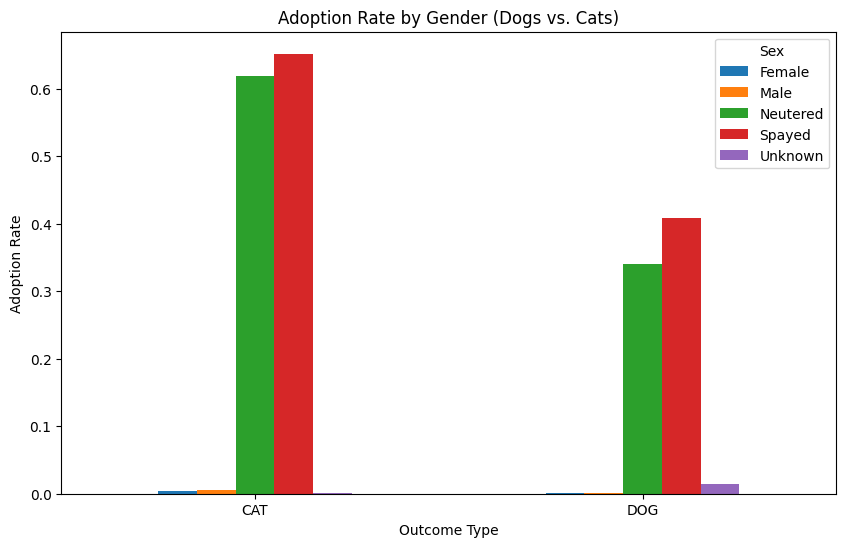

In [ ]:
adoption_rate_gender = adop_anim.groupby(['Type', 'Sex'])['Days in Shelter'].size() /df_dog_cat.groupby(['Type', 'Sex']).size()

adoption_rate_gender.unstack().plot.bar(figsize=(10,6), rot=0)
plt.title('Adoption Rate by Gender (Dogs vs. Cats)')
plt.xlabel('Outcome Type')
plt.ylabel('Adoption Rate')
plt.show();

We see that most of the animals being adopted whether it be cat or dog, are neutered or spayed, which is interesting to see. Let's do the same thing with rates, but this time let's factor in gender of the dog or cat, specifically male or female. Is it possible that female or male dogs are more likely to be adopted than female or male cats? Let's look further.

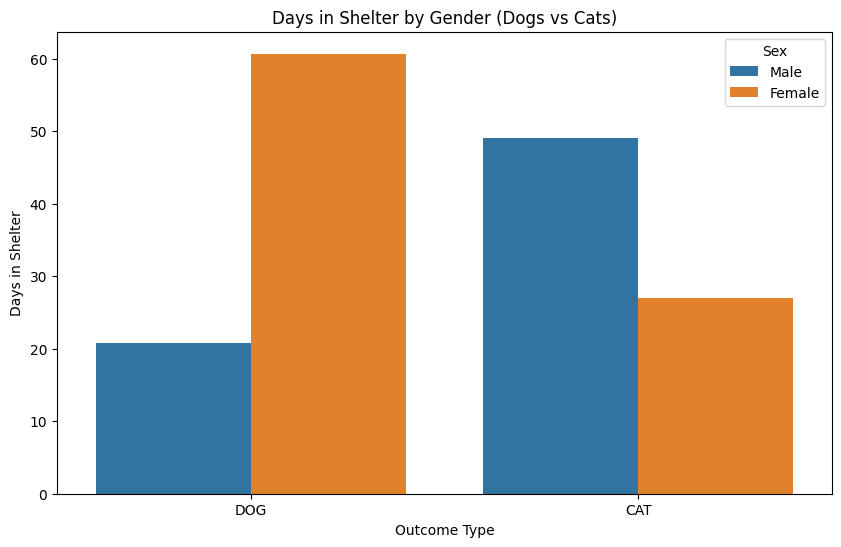

In [ ]:
filt_df = adop_anim[adop_anim['Sex'].isin(['Male', 'Female'])]

plt.figure(figsize=(10,6))
sns.barplot(x='Type', y='Days in Shelter', hue='Sex', errorbar=None, data=filt_df)
plt.title('Days in Shelter by Gender (Dogs vs Cats)')
plt.xlabel('Outcome Type')
plt.ylabel('Days in Shelter')
plt.show();


We see in the barplot, that female dogs are usually the ones that are in the shelter the longest, with male cats being other. Female cats and female dogs tend to be the ones the least in the shelter, which could show an overall preference to female animals, but this doesn't usually apply "universally" across other animals. Female cats may be adopted quicker, but the same isn't true for dogs, where female dogs experience longer shelter stays. Not only that, but most adoptions based on Sex of the animal, are either spayed or neutered. Why is that? It is possible that having spayed and neutered animals have a highly increased likelyhood in adoption due to either behaviroral reasons or health.

##Conclusions



**How does an animal's size influence its likelihood of adoption?**
Our analysis shows that an animal's size significantly influences its likelihood of adoption, with kittens being the most adopted size for cats and puppies for dogs. Further examination of the most adopted sizes revealed that common or mixed domestic breeds were more common among kittens, while pitbulls (including mixes), German Shepherd mixes, and Labrador Retrievers were most common among puppies. These findings suggest that size, especially smaller sizes, plays a key role in the adoptability of animals at the shelter.

**Analysis of Outcome Type and Income Type on Adoption and Length of Stay** From the first bar graph, we can see that for most intake types, the length of stay is similar, except for one special case. The special case is for animals 'Born Here.' Therefore, for the first part of our question, we cannot conclude that the length of stay is significantly influenced by intake type. The second part of the question is answered with the heatmap, where we observe some correlations, such as for 'OS Appointment' and 'Adoption Return.' These have a higher chance of leading to adoption compared to animals that have been 'Confiscated' or 'Born Here.' These two ultimatley lead to the if intake and outcome influence length of stay and they do as we can see for the most commom occuring combinations

**Influence and Analysis of Gender in Animals**
Considering the gender of the animals, we learned that gender plays a role in the length of the stay at the shelter. Neutered or spayed cats and dogs are usually the ones that are being adopted, with cats between 65% and dogs being 35%. However, female animals, specifically female dogs,  tend to stay at the shelter longer compared to male. In particular, male cats show a tendency to remain at the shelter for an extended time. This difference might either come from behavioral expectations, or the dog breed. However, no significant differnece in adoption rates between male and female animals were found, perhaps pointing that the issue was of the duration of the stay, rather than the adoptability. Spayed and neutered animals are prioritized than female or male animals due to behavioral reasons or health reasons.


Our analysis reveals that several factors influence an animal's likelihood of adoption, with size and intake/outcome type being significant determinants. Smaller animals, such as kittens and puppies, are adopted more frequently, while intake conditions like 'OS Appointment' and 'Adoption Return' positively correlate with adoption outcomes. Additionally, gender plays a role in the length of stay, with male animals tending to remain longer in the shelter.